In [1]:
import os
import numpy as np
from keras.preprocessing import image
from sklearn import preprocessing
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

numimg = 0

Using TensorFlow backend.


In [2]:
import pickle

#tutorial: https://www.youtube.com/watch?v=2Tw39kZIbhs

pickle_in_val = open("valfoto.pickle","rb")
valfoto = pickle.load(pickle_in_val)

pickle_in_train = open("trainfoto.pickle","rb")
trainfoto = pickle.load(pickle_in_train)

In [3]:
import pickle

#tutorial: https://www.youtube.com/watch?v=2Tw39kZIbhs

pickle_in_val2 = open("val.pickle","rb")
x_val = pickle.load(pickle_in_val2)

pickle_in_train2 = open("train.pickle","rb")
x_train = pickle.load(pickle_in_train2)

In [4]:
x_trainnorm=preprocessing.normalize(x_train)
x_valnorm=preprocessing.normalize(x_val)

In [5]:
x_mult=np.matmul(x_valnorm,np.ndarray.transpose(x_trainnorm))

In [6]:
ranks = np.argsort(x_mult, axis=1)[:,::-1]

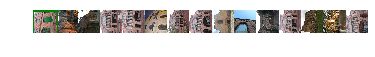

In [7]:
# get the original images for visualization
x_train_images = trainfoto
x_val_images = valfoto

h,w = (224, 224)
new_image= Image.new('RGB', (h*15,w))

# Visualize ranks of the 10 queries
offset = numimg # it will show results from query #'offset' to #offset+10
ranks_q = ranks[offset,:]
for i in range(15):
    new_image.paste( Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*0))

# visualize query
ima_q = Image.fromarray(x_val_images[offset])
ima_q = ImageOps.expand(ima_q, border=15, fill='green')

new_image.paste(ima_q, (0,w*0))

plt.imshow(new_image)
plt.axis('off')
plt.show()


In [8]:
new_image.save('Cercaindiv.jpg')

In [9]:
pickle_out_ranks = open("ranks.pickle", "wb")
pickle.dump(ranks, pickle_out_ranks)
pickle_out_ranks.close()